<a href="https://colab.research.google.com/github/cszafariqbal/It_Bootcamp/blob/main/Knn_model_Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import library

In [ ]:
import numpy as np
import pandas as pd

#Import dataset

In [ ]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data.corr()

<ipython-input-8-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


#Data visualization

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (14, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
data.Age.corr(data.Survived)

-0.07722109457217768

In [ ]:
fig = px.histogram(data,
                   x='Age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
fig = px.histogram(data,
                   x='Fare',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   nbins=47,
                   title='Distribution of Fare')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
data.Survived.corr(data.Fare)

0.2573065223849625

In [ ]:
fig = px.histogram(data,
                   x='Ticket',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   nbins=47,
                   title='Distribution Ticket')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
sex_col = {"male" : 1, "female":0}
sex = data.Sex.map(sex_col)

In [ ]:
data.Survived.corr(sex)

-0.5433513806577555

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data_df = data[['Sex','Fare','Age','Survived']]

In [ ]:
data_df

,Sex,Fare,Age,Survived
0,male,7.2500,22.0,0
1,female,71.2833,38.0,1
2,female,7.9250,26.0,1
3,female,53.1000,35.0,1
4,male,8.0500,35.0,0
...,...,...,...,...
886,male,13.0000,27.0,0
887,female,30.0000,19.0,1
888,female,23.4500,NaN,0
889,male,30.0000,26.0,1


In [ ]:
data_df.isna().sum()

Sex           0
Fare          0
Age         177
Survived      0
dtype: int64

In [ ]:
data_df['Age'] = data_df.Age.fillna(np.mean(data_df['Age']))

<ipython-input-42-31c7d3079661>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data_df.isna().sum()

Sex         0
Fare        0
Age         0
Survived    0
dtype: int64

In [ ]:
data_df.duplicated().sum()

124

In [ ]:
data_df

,Sex,Fare,Age,Survived
0,male,7.2500,22.000000,0
1,female,71.2833,38.000000,1
2,female,7.9250,26.000000,1
3,female,53.1000,35.000000,1
4,male,8.0500,35.000000,0
...,...,...,...,...
886,male,13.0000,27.000000,0
887,female,30.0000,19.000000,1
888,female,23.4500,29.699118,0
889,male,30.0000,26.000000,1


#Split Data Inputs and Target Data




In [ ]:
x = data_df.drop('Survived',axis = 1)
y = data_df['Survived']

In [ ]:
print(x)

        Sex     Fare        Age
0      male   7.2500  22.000000
1    female  71.2833  38.000000
2    female   7.9250  26.000000
3    female  53.1000  35.000000
4      male   8.0500  35.000000
..      ...      ...        ...
886    male  13.0000  27.000000
887  female  30.0000  19.000000
888  female  23.4500  29.699118
889    male  30.0000  26.000000
890    male   7.7500  32.000000

[891 rows x 3 columns]


In [ ]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


#Label Encoder of categorical columns ------> Target Column

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
x['Sex'] = label_encoder.fit_transform(x['Sex'])

In [ ]:
x

,Sex,Fare,Age
0,1,7.2500,22.000000
1,0,71.2833,38.000000
2,0,7.9250,26.000000
3,0,53.1000,35.000000
4,1,8.0500,35.000000
...,...,...,...
886,1,13.0000,27.000000
887,0,30.0000,19.000000
888,0,23.4500,29.699118
889,1,30.0000,26.000000


In [ ]:
data_df.columns

Index(['Sex', 'Fare', 'Age', 'Survived'], dtype='object')

#Scaling of numerical Columns

In [ ]:
from sklearn.preprocessing import StandardScaler
columns_to_scale = ['Sex']
scaler = StandardScaler()
x[columns_to_scale] = scaler.fit_transform(x[columns_to_scale])

In [ ]:
x = x[columns_to_scale]

In [ ]:
x

,Sex
0,0.737695
1,-1.355574
2,-1.355574
3,-1.355574
4,0.737695
...,...
886,0.737695
887,-1.355574
888,-1.355574
889,0.737695


#Split the dataset train and test dataset

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42,test_size= 0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(712, 1)
(712,)
(179, 1)
(179,)


#Create KNN Model




In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
knn_cl = KNeighborsClassifier(n_neighbors = 57,p=1)

In [ ]:
knn_cl.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=57, p=1)

In [ ]:
pred = knn_cl.predict(x_test)

In [ ]:
accuracy = classification_report(y_test,pred)

In [ ]:
accuracy

'              precision    recall  f1-score   support\n\n           0       0.80      0.84      0.82       105\n           1       0.75      0.70      0.73        74\n\n    accuracy                           0.78       179\n   macro avg       0.78      0.77      0.77       179\nweighted avg       0.78      0.78      0.78       179\n'

#Plot Accuracy at K values

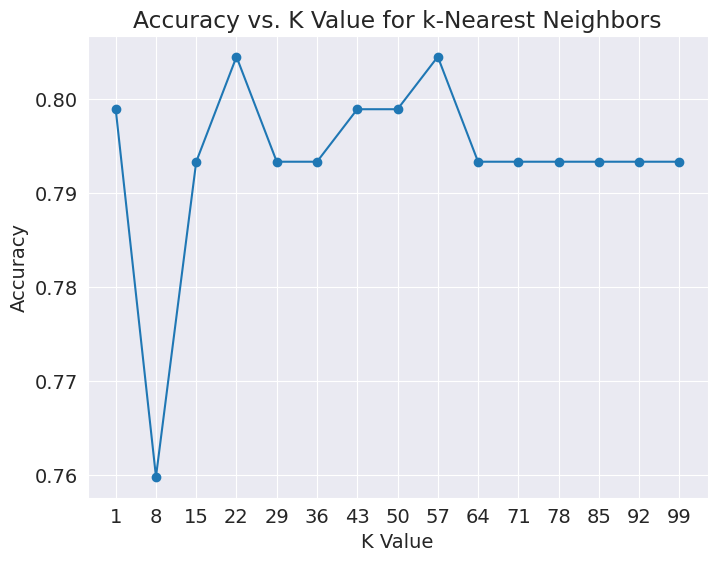

In [ ]:
from sklearn.metrics import accuracy_score
accuracies = []
k_values = [x for x in range(1,100,7)]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k,p=1)
    knn.fit(x_train, y_train)

    y_pred = knn.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs. K Value for k-Nearest Neighbors")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
acc = accuracy_score(y_test,pred)
acc

0.8044692737430168

In [ ]:
pred1 = knn_cl.predict(x_train)
acc = accuracy_score(y_train,pred1)
acc

0.7851123595505618

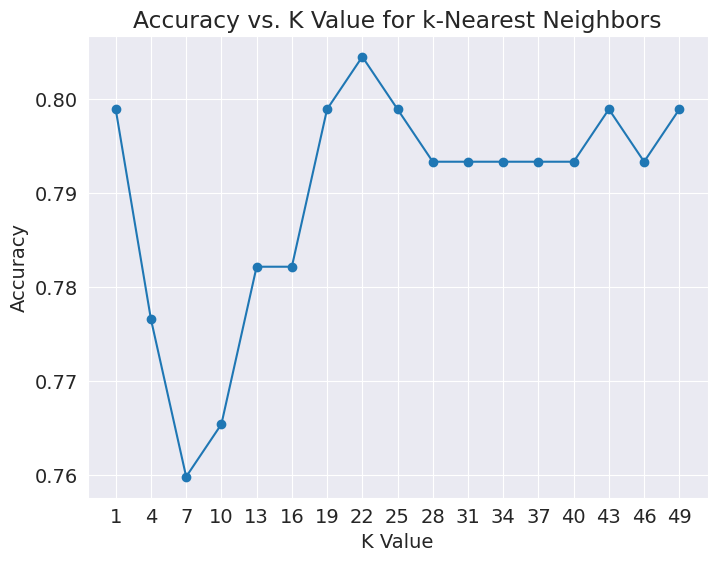

In [ ]:
from sklearn.metrics import accuracy_score
accuracies = []
k_values = [x for x in range(1,50,3)]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k,p=1)
    knn.fit(x_train, y_train)

    y_pred = knn.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs. K Value for k-Nearest Neighbors")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()